# Hello, Its Yulias Pet Work 😇

With this project, I want to emphasize my knowledge of the actual data analysis libraries and my understanding of basic statistical concepts. I use a dataset from Kaggle about opossums.
I use dataset from kaggle about opossums.

<img src="https://i.pinimg.com/originals/72/8d/21/728d210e2e994c61e27e1b2563ed6480.png" alt="opposum" width="200"/>
I hope you will have fun with my work!

## Case:

https://www.kaggle.com/abrambeyer/openintro-possum
I will answer **3** questions 💪: 
1) Can we use **total length** to predict a possum's **head length**?
2) Can we classify a possum's **sex** by its **body dimensions**?
3) Visualising data

#### Brief conclusions:

1) There is near 50% connection between those factors, with an increase in *total lehghth by 1%, head will increase by 0.53%*
2) We can only by head and total lenghth: *males have longer head, but smaller total lenghth a visa verse*.

## Data analysis. Construction and evaluation of models.

For reading CSV and working with data frame I use pandas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_theme(palette = "pastel", style = "whitegrid")

In [8]:
df = pd.read_csv("possum.csv", index_col = 0)

Its usefull to check types, maybe we have some issues with loading data.

In [4]:
df.dtypes

site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [5]:
df.head(3)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0


Checking for nulls is always good idea :)

In [6]:
pd.isnull(df).sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

We have some null values, so I use method ffill to fill them because its missle values.

In [9]:
df = df.fillna(method = "ffill")

## Building Hypothesis

In order to understand the relationship between factors, I built a correlation matrix with help of seaborn. Further I will use the seaborn library to visualize, as it gives very nice graphs.

<AxesSubplot:>

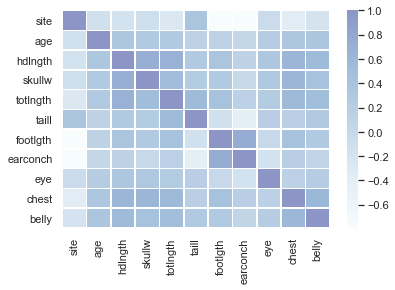

In [10]:
corr = df.corr()
sns.heatmap(corr, center = 1, linewidths = 0.5, cmap = "BuPu")

The darker color -> the stronger connection.

### 1) Can we use total length to predict a possum's head length?

Looking at the correlation matrix - yes. But let's build a regression and find out how.

<AxesSubplot:xlabel='totlngth', ylabel='hdlngth'>

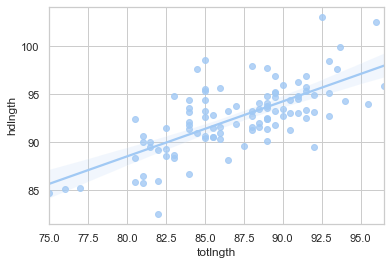

In [8]:
sns.regplot(x="totlngth", y="hdlngth", data=df)

We observe linear dependences.

For working with regression I use statsmodel library.

In [9]:
X = df["totlngth"]
X = sm.add_constant(X)

y = df["hdlngth"]

res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                hdlngth   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     93.26
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           4.68e-16
Time:                        12:51:56   Log-Likelihood:                -245.75
No. Observations:                 104   AIC:                             495.5
Df Residuals:                     102   BIC:                             500.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.7098      5.173      8.257      0.000      32.450      52.970
totlngth       0.5729      0.059      9.657      0.000       0.455       0.691
==============================================================================
Omnibus:                        5.577   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.117
Skew:                           0.422   Prob(JB):                       0.0774
Kurtosis:                       3.684   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)

Parameters:  const       42.709793
totlngth     0.572901
dtype: float64
Standard errors:  const       5.172814
totlngth    0.059325
dtype: float64


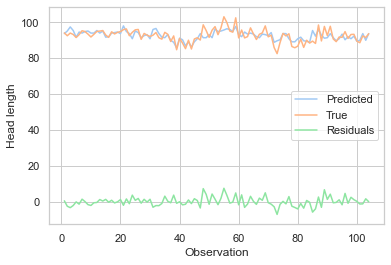

In [11]:
plt.plot(df.index, res.predict())
plt.plot(df.index, df["hdlngth"])
plt.plot(df.index, res.resid)
plt.xlabel("Observation")
plt.ylabel("Head length")
plt.legend(['Predicted', 'True', 'Residuals'])

1) Hypothesis about the adequacy of the model: R^2 = 0.478, independent variable explain the dependent variable on 47.8%.

2) Hypothesis about the significance of the model coefficient: Prob < 0.05  Coefficient is significant.

It is important to determine reliable intervals for the coefficient of the model (characterize the possibility of fluctuations of the coefficients of the constructed regression in a certain interval).

In [12]:
res.conf_int(alpha = 0.05)

,0,1
const,32.449541,52.970045
totlngth,0.455230,0.690573


**Normality of residuals:**

Jarque-Bera (JB) = 0.07 > 0.05 so residuals have normal distribution.

Text(0.5, 1.0, 'Normality of residuals')

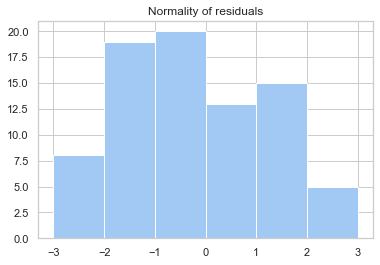

In [13]:
plt.hist(res.resid, bins = [-3,-2,-1,0,1,2,3])
plt.title("Normality of residuals") 

**Heteroscedasticity**

In [14]:
from statsmodels.stats.diagnostic import het_white
results = het_white(res.resid, X)
print('F-test\'s p-value:', results[3])

F-test's p-value: 0.9128202287973322


prob > 0.05 no heteroskedasticity

**Autocorrelation**

In [15]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
acorr_breusch_godfrey(res, 2)

(2.044629247144334, 0.359761263820219, 1.0027079652824793, 0.3705428589524245)

Since all probabilities exceed 0.05, the hypothesis H0 is accepted, ie by the Broisch-Godfrey criterion there is no autocorrelation.

In order to rank the factors according to the degree of their influence on the dependent variable, we can use the method of coefficients of elasticity (comparison of regression factors by the value of coefficients of elasticity).
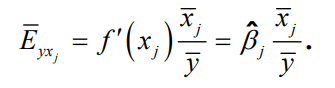

In [16]:
elasticity = 0.5729 *(df["totlngth"].mean() / df["hdlngth"].mean())
elasticity

0.5387842918998618

- There is a direct relationship between the head length and total lenght.
- With an increase in total lehghth by 1%, head will increase by 0.53%

In [17]:
ypred = res.predict(X)
print(ypred)

case
1      93.698007
2      95.130261
3      97.421866
4      95.416711
5      91.692853
         ...    
100    89.401248
101    89.974149
102    93.698007
103    89.974149
104    93.698007
Length: 104, dtype: float64


In [18]:
RMSPE = np.sqrt(np.mean(np.square(((df["hdlngth"] - ypred) / df["hdlngth"])), axis=0))
RMSPE

0.02757124698895785

The error is less than two percent, the connection is good.

### 2) Can we classify a possum's sex by its body dimensions?

Body dimensions: hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest and belly.

In [19]:
df["sex"] = df["sex"].map({"m":0.0, "f":1.0})

We observe linear dependences.

In [20]:
X = df[["hdlngth", "skullw", "totlngth", "taill", "footlgth", "earconch", "eye", "chest", "belly"]]
X = sm.add_constant(X)

Y = df["sex"]

res2 = sm.OLS(Y, X).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sex   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     2.479
Date:                Tue, 14 Sep 2021   Prob (F-statistic):             0.0138
Time:                        12:51:58   Log-Likelihood:                -62.828
No. Observations:                 104   AIC:                             145.7
Df Residuals:                      94   BIC:                             172.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9589      1.650      1.794      0.076      -0.316       6.234
hdlngth       -0.0626      0.023     -2.737      0.007      -0.108      -0.017
skullw        -0.0172      0.023     -0.750      0.455      -0.063       0.028
totlngth       0.0511      0.020      2.494      0.014       0.010       0.092
taill         -0.0287      0.036     -0.796      0.428      -0.100       0.043
footlgth       0.0100      0.019      0.532      0.596      -0.027       0.047
earconch      -0.0126      0.020     -0.642      0.522      -0.052       0.026
eye           -0.0728      0.049     -1.499      0.137      -0.169       0.024
chest          0.0497      0.036      1.395      0.166      -0.021       0.121
belly          0.0160      0.022      0.713      0.477      -0.028       0.060
==============================================================================
Omnibus:                       35.114   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.022
Skew:                           0.225   Prob(JB):                       0.0299
Kurtosis:                       1.809   Cond. No.                     6.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Significant coefficients are only: **hdlngth, totlngth**.

In [21]:
X = df[["hdlngth","totlngth"]]

Y = df["sex"]

res2 = sm.OLS(Y, X).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    sex   R-squared (uncentered):                   0.476
Model:                            OLS   Adj. R-squared (uncentered):              0.466
Method:                 Least Squares   F-statistic:                              46.35
Date:                Tue, 14 Sep 2021   Prob (F-statistic):                    4.81e-15
Time:                        12:51:58   Log-Likelihood:                         -68.029
No. Observations:                 104   AIC:                                      140.1
Df Residuals:                     102   BIC:                                      145.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hdlngth       -0.0458      0.014     -3.297      0.001      -0.073      -0.018
totlngth       0.0534      0.015      3.619      0.000       0.024       0.083
==============================================================================
Omnibus:                      182.068   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.615
Skew:                           0.269   Prob(JB):                      0.00496
Kurtosis:                       1.530   Cond. No.                         55.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print('Parameters: ', res2.params)
print('Standard errors: ', res2.bse)

Parameters:  hdlngth    -0.045769
totlngth    0.053394
dtype: float64
Standard errors:  hdlngth     0.013881
totlngth    0.014753
dtype: float64


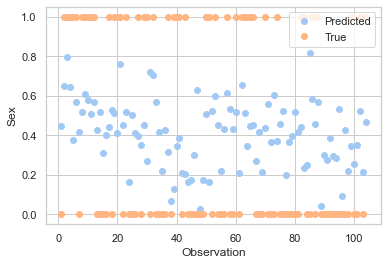

In [23]:
plt.plot(df.index, res2.predict(), "o")
plt.plot(df.index, df["sex"], "o")
plt.xlabel("Observation")
plt.ylabel("Sex")
plt.legend(["Predicted", "True"])

1) Hypothesis about the adequacy of the model: R^2 = 0.478, independent variable explain the dependent variable on 47.8%.

2) Hypothesis about the significance of the model coefficient: Prob < 0.05  Coefficient is significant.

It is important to determine reliable intervals for the coefficient of the model (characterize the possibility of fluctuations of the coefficients of the constructed regression in a certain interval).

In [24]:
res2.conf_int(alpha = 0.05)

,0,1
hdlngth,-0.073303,-0.018236
totlngth,0.024131,0.082657


**Normality of residuals:**

Jarque-Bera (JB) < 0.05 so residuals dont have normal distribution.

Text(0.5, 1.0, 'Normality of residuals')

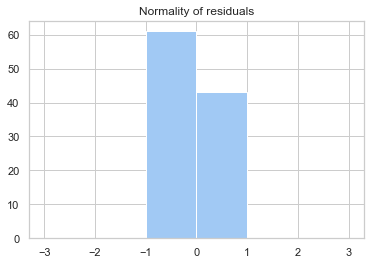

In [25]:
plt.hist(res2.resid, bins = [-3,-2,-1,0,1,2,3])
plt.title("Normality of residuals") 

In order to rank the factors according to the degree of their influence on the dependent variable, we can use the method of coefficients of elasticity (comparison of regression factors by the value of coefficients of elasticity).
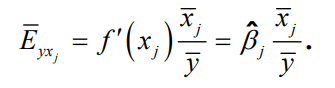

In [26]:
elasticity = -0.0458 *(df["sex"].mean() / df["hdlngth"].mean())
elasticity

-0.00020449188532505418

In [27]:
elasticity = 0.0534 *(df["sex"].mean() / df["totlngth"].mean())
elasticity

0.00025352205979773

- There is a direct relationship between the sex and head length and inderect between sex and total lenght.
- With an increase in head lehghth by 1%, sex decrease by 0.0002% (the longer head -> its male)
- With an increase in total leghth by 1% sex increase by 0.00025% (the longer body -> its female)

In [28]:
ypred2 = res2.predict(X)
print(ypred2)

case
1      0.445148
2      0.651863
3      0.796784
4      0.646522
5      0.377270
         ...   
100    0.255234
101    0.349820
102    0.522956
103    0.217089
104    0.468033
Length: 104, dtype: float64


**Multicollinearity:**

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["indicator"] = ["Head length", "Total length"]
MULTI = df[["hdlngth", "totlngth"]]
# calculating VIF for each indicator
vif_data["VIF"] = [ variance_inflation_factor(MULTI.values, i) for i in range(len(MULTI.columns))]
   
vif_data

,indicator,VIF
0,Head length,779.208518
1,Total length,779.208518


> VIF> 5 -> Two factors extra connected (out firs quastions also confirm it)

### 3) Visualising data

**Age classification:**

To understand how much of eash age group are represented in our dataset I use bar graph.

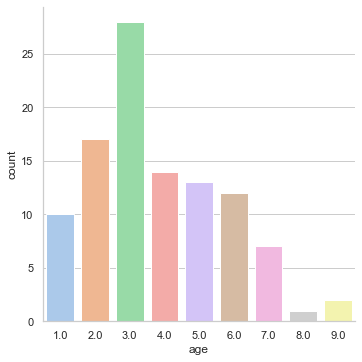

In [30]:
fig = sns.catplot(x="age", kind="count", data=df)

> Most of the oposums are presented before 5 year.

**Sex classification:**

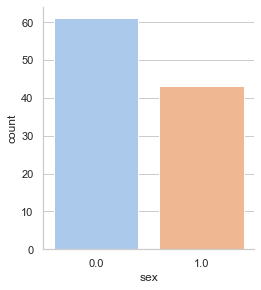

In [31]:
sns.catplot(kind = "count", x = "sex", data =df, height=4, aspect=0.9)

> There are more male opossums in our sample than female.

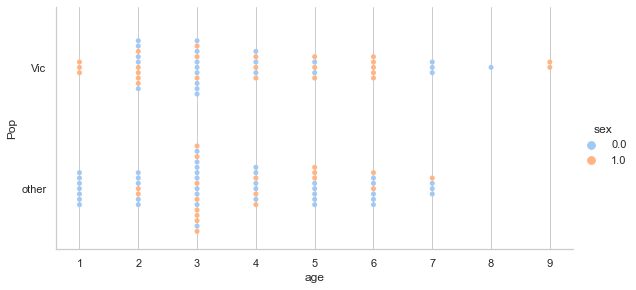

In [32]:
sns.catplot(x="age", y="Pop", hue="sex", kind="swarm", data=df, height=4, aspect=2)

> Most opossums are from Victoria, they are represented in all age categories, the opossums from other places are presented up to 7 years.

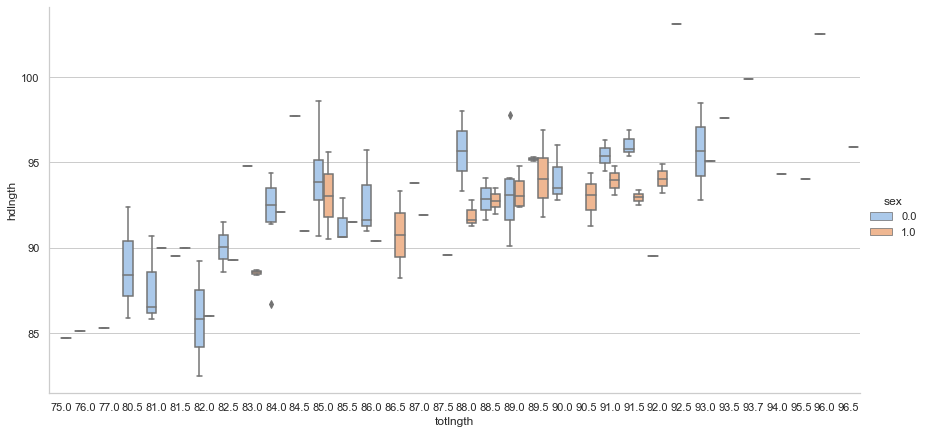

In [33]:
sns.catplot(kind = "box", x = "totlngth", y = "hdlngth", hue = "sex", data = df, height=6, aspect=2)

> Here we see a graphical representation of our two regression questions, about the length of the body and head, by which we can determine the gender. It can be seen from the graph that our **assumption are confirmed**, the longer the body, the more likely we have a female, and the larger the head, the more likely we have a male in front of us. And the longer body, the longer head.

### Thank you for your time 👋